In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
mpg_df = sns.load_dataset("mpg")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Scatter Plot

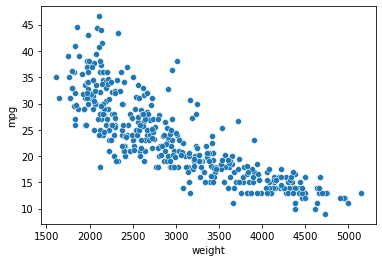

In [2]:
ax = sns.scatterplot(x="weight", y="mpg", data=mpg_df)

### Hexagonal Binning Plots

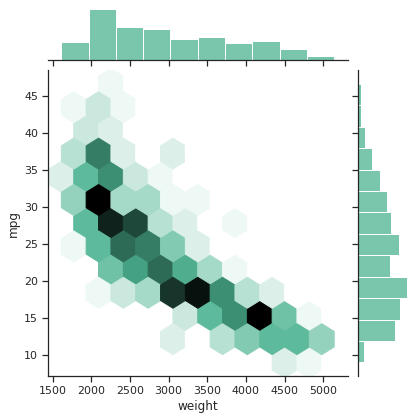

In [3]:
# A fancy version of scatter plots. Useful when data is overlapping
sns.set(style="ticks")
sns.jointplot(x=mpg_df['weight'], y=mpg_df['mpg'], kind="hex", color="#4CB391")

### Contour Plots

<AxesSubplot:xlabel='weight', ylabel='mpg'>

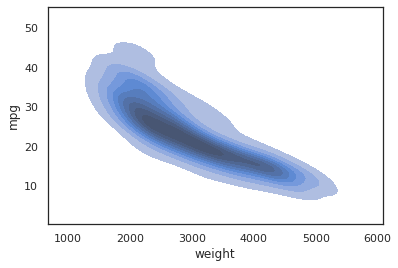

In [4]:
# Another alternative to scatter plots
sns.set_style("white")
sns.kdeplot(x = mpg_df['weight'], y=mpg_df['mpg'], shade=True)

### Line Plots
#### Line plots are great visualization techniques for scenarios where we have data that changes over time – the x axis could represent date or time, and the plot would help to visualize how a value varies over that period.

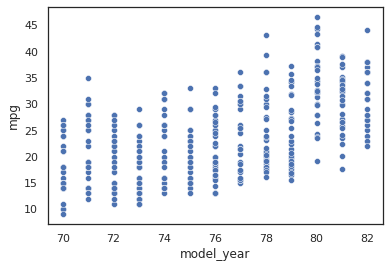

In [9]:
# """Line plots represent information as a series of data points connected by straight-line segments. They are useful for indicating the relationship between a discrete numerical feature (on the x axis)"""
ax1 = sns.scatterplot(x="model_year", y="mpg", data=mpg_df)

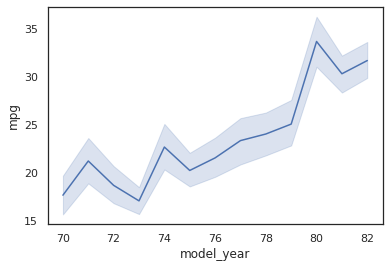

In [10]:
ax = sns.lineplot(x=mpg_df['model_year'], y=mpg_df['mpg'])

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

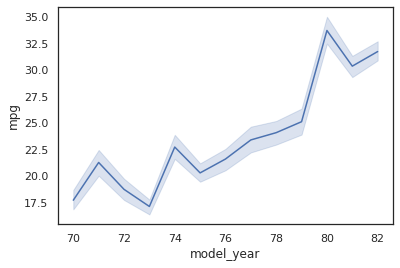

In [13]:
# """As we can see, the points connected by the solid line represent the mean of the y axis feature at the corresponding x coordinate. The shaded area around the line plot shows the confidence interval for the y axis feature (by default, seaborn sets this to a 95% confidence interval). The ci parameter can be used to change to a different confidence interval. The phrase x% confidence interval translates to a range of feature values where x% of the data points are present. An example of changing to a confidence interval of 68% is shown in the code that follows."""
sns.lineplot(x=mpg_df['model_year'], y=mpg_df['mpg'], ci=68)

### Heatmaps
#### A heatmap is a visual representation of a specific continuous numerical feature as a function of two other discrete features (either a categorical or a discrete numerical) in the dataset. The information is presented in grid form – each cell in the grid corresponds to a specific pair of values taken by the two discrete features and is colored based on the value of the third numerical feature. A heatmap is a great tool to visualize high-dimensional data and even to tease out features that are particularly variable across different classes

In [17]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [18]:
df_pivoted = flights_df.pivot("month", "year", "passengers")
df_pivoted

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

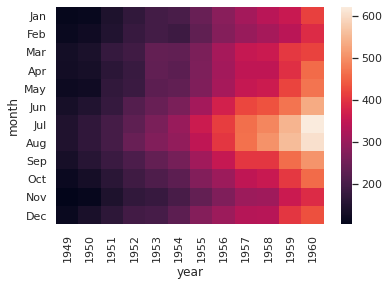

In [19]:
sns.heatmap(df_pivoted)

Did you notice how the order of months got rearranged in the plots but some months( for example, July and August) stuck together because of their similar trends (This similarity depends on distant metric used)? In both July and August, the number of flights increased relatively more drastically in the last few years till 1960.


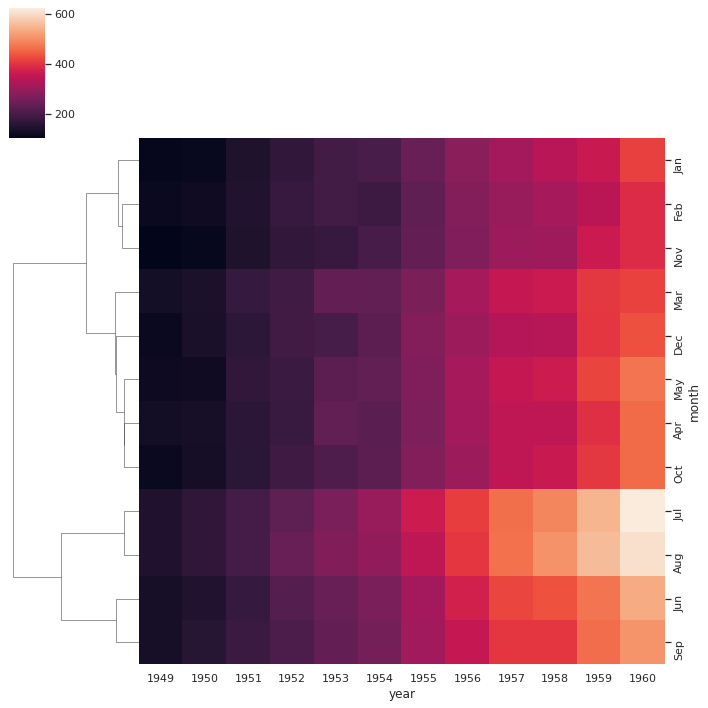

In [29]:
# Clustering and distance mertic in heatmaps
ax = sns.clustermap(df_pivoted, col_cluster=False, row_cluster=True)
print("Did you notice how the order of months got rearranged in the plots but some months( for example, July and August) stuck together because of their similar trends (This similarity depends on distant metric used)? In both July and August, the number of flights increased relatively more drastically in the last few years till 1960.")

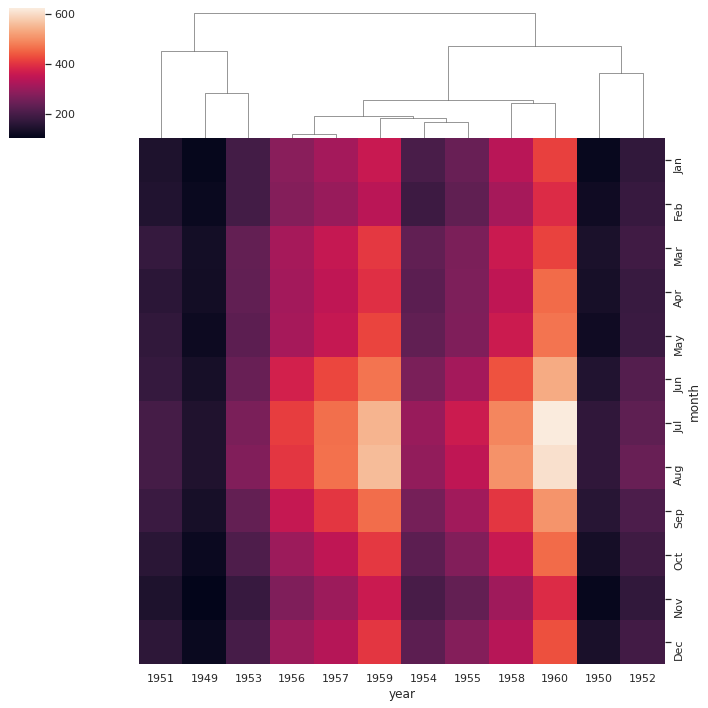

In [30]:
# Default metric is 'euclidean'
ax = sns.clustermap(df_pivoted, row_cluster=False, metric='correlation')

### Create Plots that Present Summary Statistics of Data

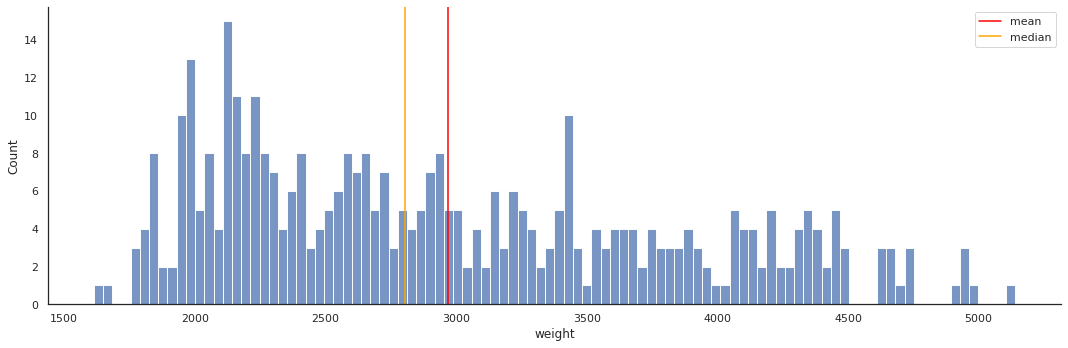

In [43]:
ax = sns.displot(mpg_df["weight"], bins = 100, aspect=3)
plt.axvline(x = np.mean(mpg_df.weight), color='red', label='mean')
plt.axvline(x = np.median(mpg_df.weight), color='orange', label='median')
plt.legend(loc='upper right')
# Mean and median are not same, hence the data is not normally distributed

### Boxplots
#### Excellent to examine the relationship between the summary statistics for numerical feature in relation to other categorical features

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

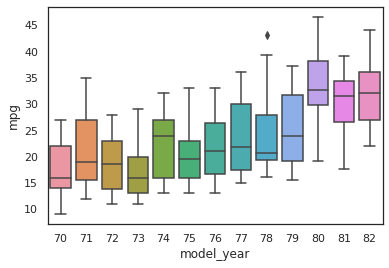

In [45]:
sns.boxplot(x = 'model_year', y='mpg', data=mpg_df)
# Box boundaries indicate the interquartile range, the upper boundary marks 25% quartile, and the lower boundary marks th 75% quartile.
# The horizontal line inside the box indicates the median.
# Solo points outside of the whisters (The T-shaped bars above and below box) mark outliers, while whiskers themsellves shows the maximum and minimum values that are not outliers

In [46]:
mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,model_decade
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,80
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,80
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,80
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,80
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,80


<AxesSubplot:xlabel='model_decade', ylabel='mpg'>

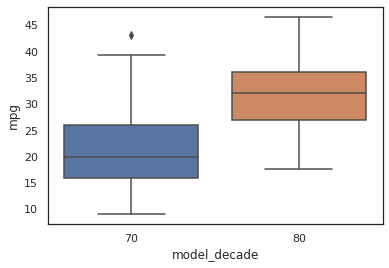

In [47]:
sns.boxplot(x='model_decade', y='mpg', data=mpg_df)

<AxesSubplot:xlabel='model_decade', ylabel='mpg'>

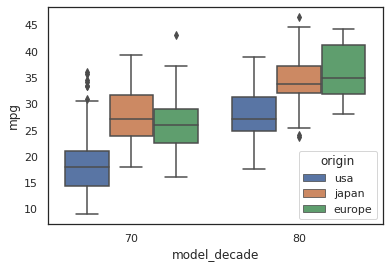

In [50]:
sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

### Violin Plots

<AxesSubplot:xlabel='model_decade', ylabel='mpg'>

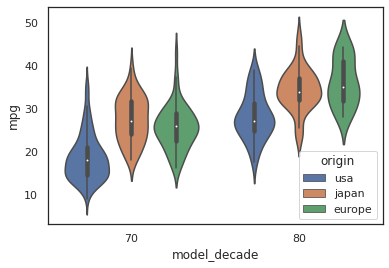

In [51]:
sns.violinplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')